# Find High-Risk Customers

- [Introduction](#intro)
- [Assessing Data](#step1)
- [Cleaning Data](#step2)
    - [1. Rename dob_years column](#step21)
    - [2. Fixing inconsistent use of capitalization in 'education' column](#step22)
    - [3. Processing missing values ('days_employed' and 'total_income' columns)](#step23)
    - [4. Change data type of 'total_income' from float to int](#step24)
    - [5. Processing duplicates](#step25)
    - [6. Fixing unrealistic values in 'children' column](#step26)
    - [7. Categorizing Data](#step27)
- [Analyzing Data](#step3)
- [General conclusion](#step4)

<a id='intro'></a>
## __Introduction__

The subject of this analysis is a Credit Scoring dataset that describes 21,525 customers who took a loan in a bank.

The main goal of the analysis is to find a connection between specific customers' features and repaying their loans on time. So the following questions will be investigated:

- Is there a connection between having kids and repaying a loan on time?
- Is there a connection between marital status and repaying a loan on time?
- Is there a connection between income level and repaying a loan on time?
- How do different loan purposes affect on-time loan repayment?

#### Description of the data

`children`: the number of children in the family\
`days_employed`: how long the customer has been working\
`dob_years`: the customer’s age\
`education`: the customer’s education level\
`education_id`: an identifier for the customer’s education\
`family_status`: the customer’s marital status\
`family_status_id`: an identifier for the customer’s marital status\
`gender`: the customer’s gender\
`income_type`: the customer’s income type\
`debt`: whether the customer has ever defaulted on a loan\
`total_income`: the customer’s income\
`purpose`: a reason for taking out a loan

<a id='step1'><a>
## __Assessing Data__

In [ ]:
# import python packages and libraries

import pandas as pd
import numpy as np
import scipy
import nltk 
#from scipy.stats import chi2_contingency
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer 
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
# read credit_scoring_eng.csv file into `df` dataframe

df = pd.read_csv('../datasets/credit_scoring_eng.csv')

In [3]:
# get the first 10 rows of the dataset

df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [4]:
# get the last 10 rows of the dataset

df.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,secondary education,1,married,0,F,employee,1,17517.812,to become educated
21516,0,-914.391429,42,bachelor's degree,0,married,0,F,business,0,51649.244,purchase of my own house
21517,0,-404.679034,42,bachelor's degree,0,civil partnership,1,F,business,0,28489.529,buying my own car
21518,0,373995.710838,59,SECONDARY EDUCATION,1,married,0,F,retiree,0,24618.344,purchase of a car
21519,1,-2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car
21524,2,-1984.507589,40,secondary education,1,married,0,F,employee,0,13127.587,to buy a car


In [5]:
# get random 10 rows of the dataset

df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
19012,0,-275.504604,38,secondary education,1,unmarried,4,M,employee,0,17545.638,transactions with commercial real estate
14028,0,338712.950062,69,secondary education,1,widow / widower,2,F,retiree,0,21527.878,education
5367,0,386413.322172,59,secondary education,1,married,0,M,retiree,0,24155.277,building a property
4868,0,-555.612120,29,Bachelor's Degree,0,married,0,F,employee,0,16026.440,going to university
16520,2,-5831.353423,41,bachelor's degree,0,civil partnership,1,F,employee,0,19708.546,to have a wedding
4174,2,-1603.078580,28,bachelor's degree,0,married,0,F,civil servant,0,18014.409,building a real estate
1346,0,-3055.655220,29,Bachelor's Degree,0,unmarried,4,M,employee,0,31386.316,purchase of the house
10160,0,388462.678487,55,bachelor's degree,0,married,0,F,retiree,0,20207.466,building a property
17577,1,-2856.106832,26,secondary education,1,divorced,3,M,employee,0,6764.879,buy commercial real estate
10463,2,-5747.782637,53,secondary education,1,married,0,F,employee,0,16757.623,purchase of my own house


In [6]:
# get basic info about the dataframe using `info` method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
# check duplicates using `duplicated()` method

df.duplicated().sum()

54

In [8]:
# get more info about values distributions of all the variables using `describe` method

df.describe(include = 'all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [9]:
# unique values of the `children` variable

df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

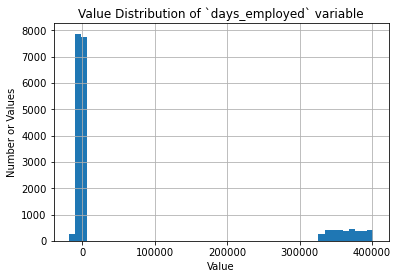

In [10]:
# value distribution of the `days_employed` variable

df['days_employed'].hist(bins = 50).set(title = 'Value Distribution of `days_employed` variable', xlabel = 'Value', ylabel = 'Number or Values');

The histogram shows that there are have two entirely different groups of the `days_employed` variable: one of them contains about 15,000 value less than 0; the second one consists of a much smaller number of values greater than 30,000. Let's check how many values we have in each group.


In [11]:
# how many rows have positive values in the `days_employed` column and how many - negative

negative = df[df['days_employed'] >= 0]['days_employed'].value_counts().sum()
positive = df[df['days_employed'] < 0]['days_employed'].value_counts().sum()

print('The `days_employed` column contains {} postitive and {} negative values.'.format(positive, negative))

The `days_employed` column contains 15906 postitive and 3445 negative values.


Let's check the distribution of the positive values in the `days_employed` column.

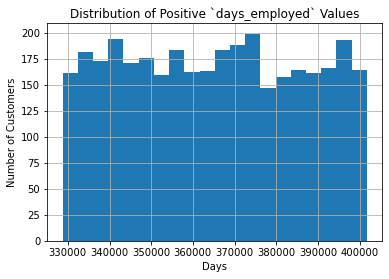

In [12]:
# positive value distribution of the `days_employed` variable

df[df['days_employed'] >= 0]['days_employed'].hist(bins = 20).set(title = 'Distribution of Positive `days_employed` Values', 
                                                                  xlabel = 'Days', ylabel = 'Number of Customers');

All positive values in the `days_employed` column are distributed relatively evenly in the range from about `33,000` to `40,000`.

In [13]:
# descriptive statistics for the positive values of the `days_employed` variable

df[df['days_employed'] >= 0]['days_employed'].describe()

count      3445.000000
mean     365004.309916
std       21075.016396
min      328728.720605
25%      346639.413916
50%      365213.306266
75%      383246.444219
max      401755.400475
Name: days_employed, dtype: float64

To better understanding, transform these days into years, considering that one year is equal to 365 days.

In [14]:
# transform days to years

df[df['days_employed'] >= 0]['days_employed'].div(365).describe()

count    3445.000000
mean     1000.011808
std        57.739771
min       900.626632
25%       949.697024
50%      1000.584401
75%      1049.990258
max      1100.699727
Name: days_employed, dtype: float64

Even positive these values seem unrealistic: 900 or 1100 years of employment are real only for Time Lords :)

Now I'd like to check the distribution of the negative values in the `days_employed` column.

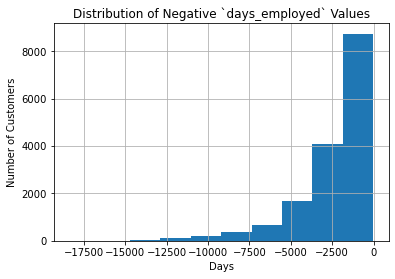

In [15]:
# distribution of the `days_employed` negative values

df[df['days_employed'] < 0]['days_employed'].hist(bins = 10).set(title = 'Distribution of Negative `days_employed` Values', 
                                                                 xlabel = 'Days', ylabel = 'Number of Customers');

The negative values are in the range from `0` to `-17500`. Let's check descriptive statistics for the `days_employed` variable's negative values, having previously converted them to positive and transformed days into years.

In [16]:
abs(df[df['days_employed'] < 0]['days_employed']).div(365).describe()

count    15906.000000
mean         6.446619
std          6.312997
min          0.066141
25%          2.072252
50%          4.465807
75%          8.650630
max         50.380685
Name: days_employed, dtype: float64

Well, the negative values seem more realistic in terms of work experience length.

In [17]:
# how many rows have zero in the `dob_years` column

df[df['dob_years'] == 0]['dob_years'].shape[0]

101

Since there are zero values in the `dob_years` column, let's find the smallest value greater than 0.

In [18]:
# minimum positive value in the `dob_years` column

df[df['dob_years'] != 0]['dob_years'].min()

19

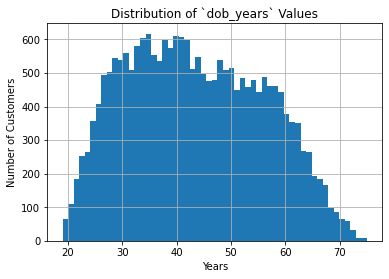

In [19]:
# value distribution of the `dob_years` variable without zero values

df[df['dob_years'] != 0]['dob_years'].hist(bins = 55).set(title = 
                                                          'Distribution of `dob_years` Values', xlabel = 'Years', ylabel = 'Number of Customers');

As can be inferred from the histogram, most customers are people aged about 25-60 years.

In [20]:
# descriptive statistics for the positive values of the `days_employed` variable

df[df['dob_years'] > 19]['dob_years'].describe()

count    21410.000000
mean        43.513498
std         12.234900
min         20.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [21]:
# unique values of the `education` variable

df['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [22]:
# unique values of the `education` variable ignoring the case of letters

df['education'].str.lower().value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [23]:
# unique values of the `education_id` variable

df['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

In [24]:
# unique values of the `family_status` variable

df['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [25]:
# unique values of the `family_status_id` variable

df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [26]:
# unique values of the `gender` variable

df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [27]:
# unique values of the `income_type` variable

df['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [28]:
# unique values of the `debt` variable

df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

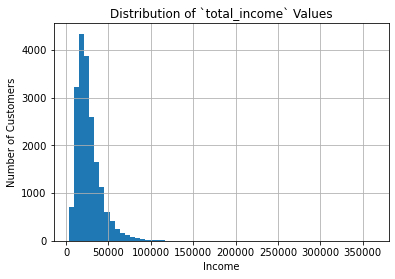

In [29]:
# check the value distribution of the `total_income` variable

df['total_income'].hist(bins = 60).set(title = 'Distribution of `total_income` Values', xlabel = 'Income', ylabel = 'Number of Customers');

In [30]:
# descriptive statistics for the positive values of the `total_income` variable

df['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

In [31]:
# number of rows where `total_income` values are more then 100,000

df[df['total_income'] > 100000]['total_income'].shape[0]

99

The histogram and descriptive statistics show us that most customers have income in the range from about 3,500 to 50,000 dollars, and only a few of them have an income of more than 100,000 dollars.

In [32]:
# unique values of the `purpose` variable

df['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [33]:
# number of unique values of the `purpose` variable

df['purpose'].nunique()

38

### Conclusion

So, here we have a dataframe that contains 21525 rows and 12 columns.

#### Identified issues:

- there are 54 duplicate rows in the dataset;
- `days_employed` and `total_income` variables have missing values;
- `days_employed` and `total_income` variables should be represented by integers;
- `children` variable has unrealistic values: `-1` in 47 rows and `20` in 76 rows;
- `days_employed` variable has unrealistic values: negative in 15906 rows and incredibly large in 3445 rows; 
- `dob_years` variable has zero values in 101 rows;
- `dob_years` variable's name is not easy to understand;
- `education` variable has values with inconsistent use of capitalization;
- `gender` variable has the value called XNA (according to some Kaggle discussions, XNA/XAP denote NA values);
- `purpose` variable has 38 distinct values, but some of them describe the same purposes in different words.

___
<a id='step2'><a>
## __Cleaning Data__

I decided not to fix the `XNA` value in the `gender` column and zero values in the `dob_years` column since these issues are minor and not crucial to further analysis. Otherwise, I would discard these rows - they are only 0.5% of the dataset as we can see below.

In [34]:
# percentage of rows with issues in `gender` and `dob_years` variables

df['gender'].value_counts()

print('{:.1%}'.format((len(df[df['dob_years'] == 0])+len(df[df['gender'] == 'XNA']))/df.shape[0]))

0.5%


<a id='step21'><a>
### __1. Rename `dob_years` column__

In [35]:
# rename the `dob_years` column using `rename()` method

df.rename(columns = {'dob_years':'age'}, inplace = True)

# check the result

df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


### Conclusion

I changed the name of the `dob_years` column to `age` using `rename` method since the name was not easy to understand.

<a id='step22'><a>
### __2. Fixing inconsistent use of capitalization in `education` column__

In [36]:
# convert the case of the values letters for the `education` variable

df['education'] = df['education'].str.lower()

# check the result 

df['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

### Conclusion

As I have found out in the previous step, some values in `education` column were strings with lowercase characters, some - with uppercase characters, some - with capitalized characters (first letter of each word were uppercase). I used `str.lower()` method to convert strings to lowercase.

<a id='step23'><a>
### __3. Processing missing values (`days_employed` and `total_income` columns)__

In [37]:
# number of the `total_income` missing values

print('Total missing values in `total_income`:', df['total_income'].isnull().sum())

# percentage of the `total_income` missing values

print('Percentage of missing values in `total_income`: {:.1%}'.format(df['total_income'].isnull().sum(axis = 0)/df.shape[0]))

Total missing values in `total_income`: 2174
Percentage of missing values in `total_income`: 10.1%


In [38]:
# the number of the `days_employed` missing values

print('Total missing values in `days_employed`:', df['days_employed'].isnull().sum())

# percentage of the `days_employed` missing values

print('Percentage of missing values in `days_employed`: {:.1%}'.format(df['days_employed'].isnull().sum(axis = 0)/df.shape[0]))

Total missing values in `days_employed`: 2174
Percentage of missing values in `days_employed`: 10.1%


Since the `days_employed` variable has missing values as well as the `total_income` variable, check if there are some connections between their `NaN` values.

In [39]:
# create a list with indices of rows with `total_income` missing values

idx_total_income = []
for index, row in df[df['total_income'].isnull()].iterrows():
    idx_total_income.append(index)

# create a list with indices of rows with `days_employed` missing values

idx_days_employed = []
for index, row in df[df['days_employed'].isnull()].iterrows():
    idx_days_employed.append(index)
    
    
# check if the `total_income` missing values and the `days_employed` missing values are in the same rows

if idx_total_income == idx_days_employed:
    print('Missing values of the `days_employed` and `total_income` variables are in the same rows.')
else:
    print('Missing values of the `days_employed` and `total_income` variables are not in the same rows.')

Missing values of the `days_employed` and `total_income` variables are in the same rows.


Now I need to identify the type of missing data I'm dealing with: MCAR, MAR or MNAR. If there is no pattern in missing data, I can assume that the type of missing data is MCAR or MAR. In this case, since the missing values are quantitative, I can fill them with representative values like the median or mean.

To determine if there is any pattern in the missing data, I will create a subset of the `df` dataframe with only rows with the missing values in the `total_income` and `days_employed` columns. Then I will compare the value distributions of both datasets.

In [40]:
# create a dataframe with only the missing data in the `total_income` and `days_employed` columns

df_nan = df[(df['total_income'].isnull()) & (df['days_employed'].isnull())]

# check the result

df_nan.head(10)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


Compare value distributions of all the quantitative variables in both datasets.

In [41]:
# value distributions of the `df` variables

df.describe()

,children,days_employed,age,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [42]:
# value distributions of the `df_nan` variables

df_nan.describe()

,children,days_employed,age,education_id,family_status_id,debt,total_income
count,2174.000000,0.0,2174.000000,2174.000000,2174.000000,2174.000000,0.0
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
std,1.469356,NaN,12.531481,0.530157,1.418220,0.268543,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.250000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


It seems like there are not significant differences in the quantitative variables' value distributions.

Compare value distributions of the categorial variables like `education`, `family_status`, `gender`, `income_type` and `purpose`.

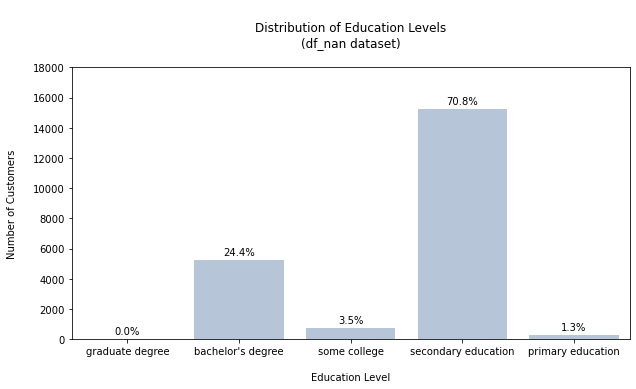

In [43]:
# `education` value distribution of the `df_nan` dataframe

plt.figure(figsize = [10, 5])
y_ticks = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000]
education_order = ['graduate degree', 'bachelor\'s degree', 'some college', 'secondary education', 'primary education']
sb.countplot(data = df, x = 'education', color = 'lightsteelblue', order = education_order)

categories = df['education'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Education Levels\n(df_nan dataset)\n')
plt.xlabel('\nEducation Level')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

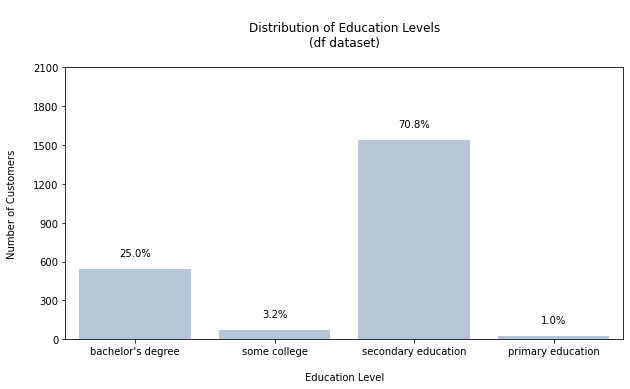

In [44]:
# `education` value distribution of the `df` dataframe

plt.figure(figsize = [10, 5])
y_ticks = [0, 300, 600, 900, 1200, 1500, 1800, 2100]
education_order = ['bachelor\'s degree', 'some college', 'secondary education', 'primary education']
sb.countplot(data = df_nan, x = 'education', color = 'lightsteelblue', order = education_order)

categories = df_nan['education'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df_nan))
    plt.text(loc, categories[label.get_text()] + 100, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Education Levels\n(df dataset)\n')
plt.xlabel('\nEducation Level')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

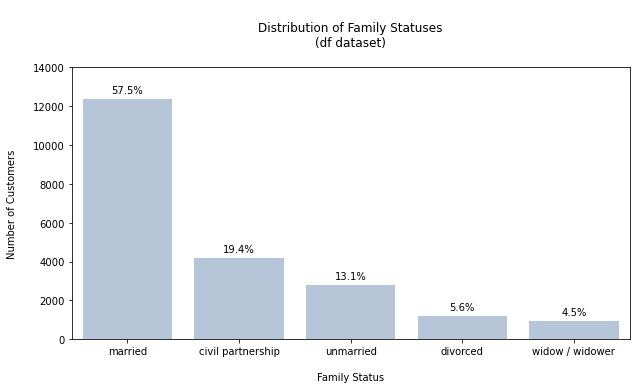

In [45]:
# `family_status` value distribution of the `df` dataframe

plt.figure(figsize = [10, 5])
y_ticks = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]
family_status_order = ['married', 'civil partnership', 'unmarried', 'divorced', 'widow / widower']
sb.countplot(data = df, x = 'family_status', color = 'lightsteelblue', order = family_status_order)

categories = df['family_status'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Family Statuses\n(df dataset)\n')
plt.xlabel('\nFamily Status')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

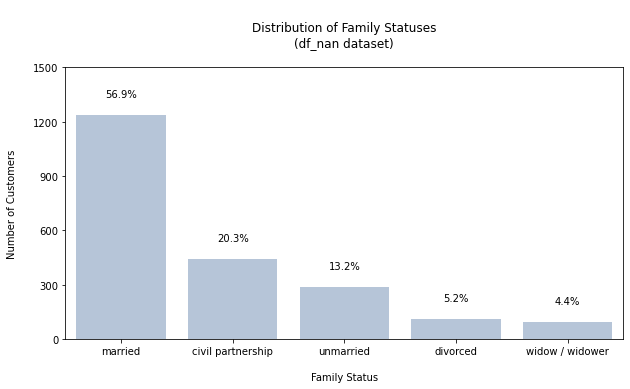

In [46]:
# `family_status` value distribution of the `df_nan` dataframe

plt.figure(figsize = [10, 5])
y_ticks = [0, 300, 600, 900, 1200, 1500]
family_status_order = ['married', 'civil partnership', 'unmarried', 'divorced', 'widow / widower']
sb.countplot(data = df_nan, x = 'family_status', color = 'lightsteelblue', order = family_status_order)

categories = df_nan['family_status'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df_nan))
    plt.text(loc, categories[label.get_text()] + 100, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Family Statuses\n(df_nan dataset)\n')
plt.xlabel('\nFamily Status')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

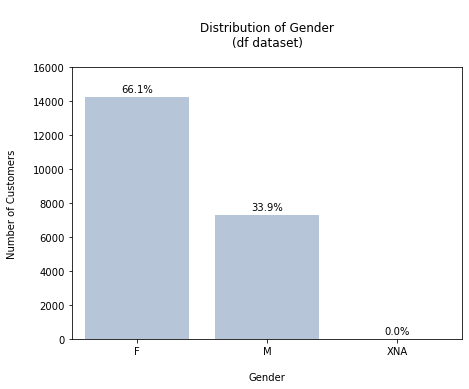

In [47]:
# `gender` value distribution of the `df` dataframe

plt.figure(figsize = [7, 5])
y_ticks = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
gender_order = ['F', 'M', 'XNA']
sb.countplot(data = df, x = 'gender', color = 'lightsteelblue', order = gender_order)

categories = df['gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Gender\n(df dataset)\n')
plt.xlabel('\nGender')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

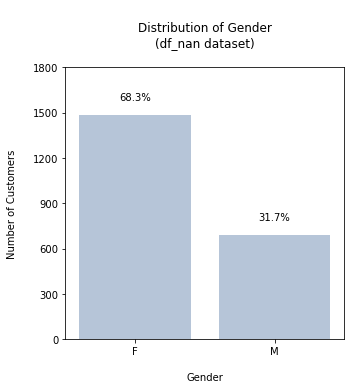

In [48]:
# `gender` value distribution of the `df_nan` dataframe

plt.figure(figsize = [5, 5])
y_ticks = [0, 300, 600, 900, 1200, 1500, 1800]
gender_order = ['F', 'M']
sb.countplot(data = df_nan, x = 'gender', color = 'lightsteelblue', order = gender_order)

categories = df_nan['gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df_nan))
    plt.text(loc, categories[label.get_text()] + 100, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Gender\n(df_nan dataset)\n')
plt.xlabel('\nGender')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

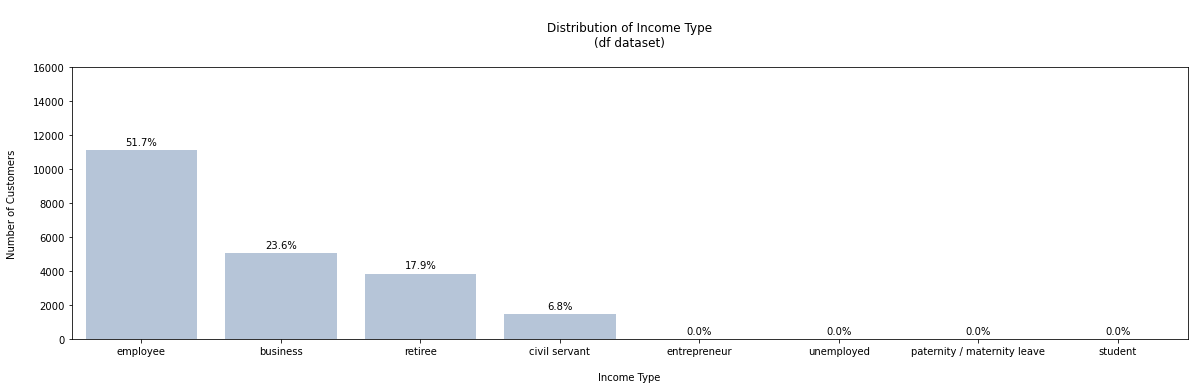

In [49]:
# `income_type` value distribution of the `df` dataframe

plt.figure(figsize = [20, 5])
y_ticks = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
income_type_order = ['employee', 'business', 'retiree', 'civil servant', 'entrepreneur', 'unemployed', 'paternity / maternity leave', 'student']
sb.countplot(data = df, x = 'income_type', color = 'lightsteelblue', order = income_type_order)

categories = df['income_type'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Income Type\n(df dataset)\n')
plt.xlabel('\nIncome Type')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

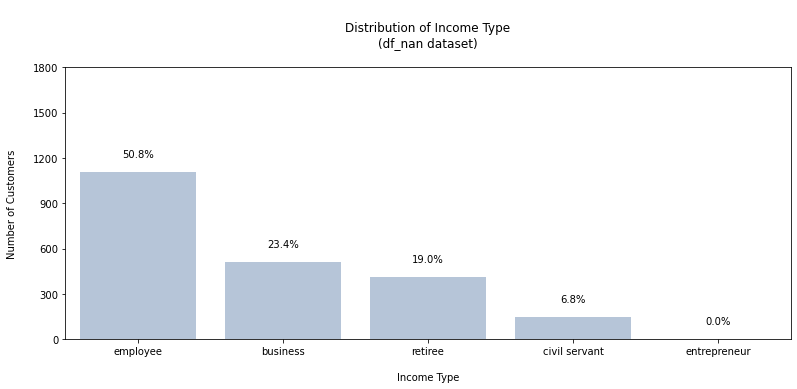

In [50]:
# `income_type` value distribution of the `df_nan` dataframe

plt.figure(figsize = [13, 5])
y_ticks = [0, 300, 600, 900, 1200, 1500, 1800]
income_type_order = ['employee', 'business', 'retiree',  'civil servant', 'entrepreneur']
sb.countplot(data = df_nan, x = 'income_type', color = 'lightsteelblue', order = income_type_order)

categories = df_nan['income_type'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df_nan))
    plt.text(loc, categories[label.get_text()] + 100, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Income Type\n(df_nan dataset)\n')
plt.xlabel('\nIncome Type')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

There 38 unique values in `purpose` column, so the distributions would not be clear enough to see the differences between the `df` and `df_nan`. I need to reduce the number of the `purpose` unique values to make it easier to identify if there is a pattern in missing data related to the variable.

In [51]:
# unique values of the `purpose` variable

df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

As we can see, all these unique values describe a much smaller number of credit purposes in different words. For example, `to have a wedding`, `having a wedding`, and `wedding ceremony` reflect the same purpose - a wedding. So I can classify all the values of the `purpose` variable into a small number of categories.

If I had a much bigger set of purposes, it would be reasonable to extract all nouns from the purpose phrases and then somehow to analyze which of the nouns correctly represents each of the purposes. However, I preferred to extract all possible purposes from this definitely not big set manually. 

I have identified the following categories of credit purposes: `real estate`, `car`, `education`, `wedding`.

The next step is to create a dictionary `{purpose : purpose category}`.

In [52]:
# create a list with all the purpose categories replacing `real estate` by `house` to ease further steps 

purpose_categories = ['house', 'car', 'education', 'wedding']

# check the result

purpose_categories

['house', 'car', 'education', 'wedding']

In [53]:
# create empty dictionary

purpose_category = {}

# analyze the `purpose` values and add the `purpose` value as a key and a category from the `purpose_categories` list as a value 

for purpose in df['purpose'].unique().tolist():
    words = [word for word in word_tokenize(purpose) if not word in stopwords.words('english')]
    for word in words:
        if WordNetLemmatizer().lemmatize(word, pos = 'n') in purpose_categories:
            purpose_category[purpose] = WordNetLemmatizer().lemmatize(word, pos = 'n')
        elif SnowballStemmer('english').stem(word) == 'hous' or word in ['real', 'estate', 'property']:
            purpose_category[purpose] = 'house'
        elif SnowballStemmer('english').stem(word) == 'educ' or word == 'university':
            purpose_category[purpose] = 'education'

# check the result

purpose_category

{'purchase of the house': 'house',
 'car purchase': 'car',
 'supplementary education': 'education',
 'to have a wedding': 'wedding',
 'housing transactions': 'house',
 'education': 'education',
 'having a wedding': 'wedding',
 'purchase of the house for my family': 'house',
 'buy real estate': 'house',
 'buy commercial real estate': 'house',
 'buy residential real estate': 'house',
 'construction of own property': 'house',
 'property': 'house',
 'building a property': 'house',
 'buying a second-hand car': 'car',
 'buying my own car': 'car',
 'transactions with commercial real estate': 'house',
 'building a real estate': 'house',
 'housing': 'house',
 'transactions with my real estate': 'house',
 'cars': 'car',
 'to become educated': 'education',
 'second-hand car purchase': 'car',
 'getting an education': 'education',
 'car': 'car',
 'wedding ceremony': 'wedding',
 'to get a supplementary education': 'education',
 'purchase of my own house': 'house',
 'real estate transactions': 'house

And now I can create a new column called `purpose_category` with values from the list `['house', 'car', 'education', 'wedding']`.

In [54]:
# add a new column named `purpose_category` to the `df` dataframe

df['purpose_category'] = df['purpose'].replace(purpose_category)

# add a new column named `purpose_category` to the `df_nan` dataframe

df_nan['purpose_category'] = df_nan['purpose'].replace(purpose_category)

# check the result

display(df.head(5))
display(df_nan.head(5))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,car
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,wedding


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,house
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,car
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,wedding


In [55]:
# rename the 'house' value in the `purpose_category` variable to `real estate` in the 'df' dataframe

df['purpose_category'].replace({'house': 'real estate'}, inplace = True)

# rename the 'house' value in the `purpose_category` variable to `real estate` in the 'df_nan' dataframe

df_nan['purpose_category'].replace({'house': 'real estate'}, inplace = True)

# check the result

display(df.head(5))
display(df_nan.head(5))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,real estate
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,car
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,real estate
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,wedding


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,car
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,wedding


Now, instead of comparing `purpose` value distributions, I will compare value distributions of the `purpose_category` variable.

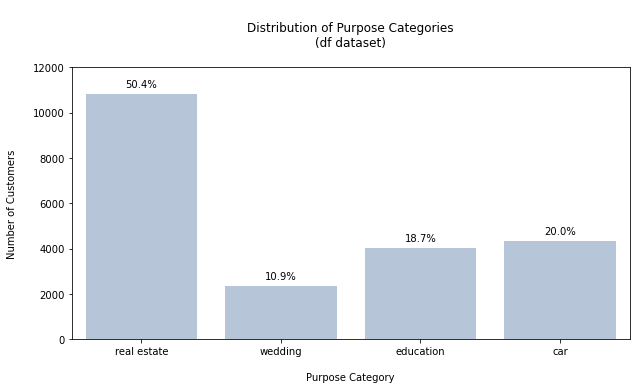

In [56]:
# `purpose_category` value distribution of the `df_nan` dataframe

plt.figure(figsize = [10, 5])
y_ticks = [0, 2000, 4000, 6000, 8000, 10000, 12000]
income_type_order = ['real estate', 'wedding', 'education', 'car']
sb.countplot(data = df, x = 'purpose_category', color = 'lightsteelblue', order = income_type_order)

categories = df['purpose_category'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Purpose Categories\n(df dataset)\n')
plt.xlabel('\nPurpose Category')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

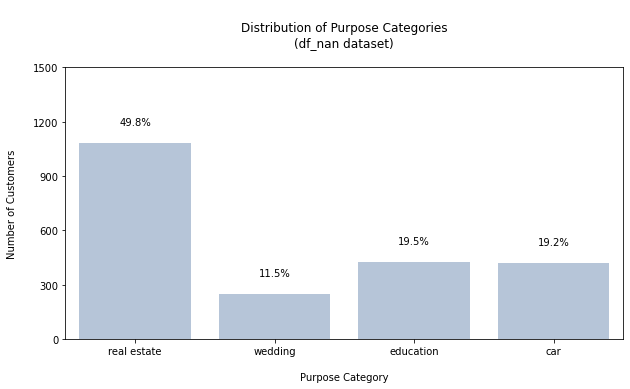

In [57]:
# `purpose_category` value distribution of the `df_nan` dataframe

plt.figure(figsize = [10, 5])
y_ticks = [0, 300, 600, 900, 1200, 1500]
income_type_order = ['real estate', 'wedding', 'education', 'car']
sb.countplot(data = df_nan, x = 'purpose_category', color = 'lightsteelblue', order = income_type_order)

categories = df_nan['purpose_category'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(df_nan))
    plt.text(loc, categories[label.get_text()] + 100, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Purpose Categories\n(df_nan dataset)\n')
plt.xlabel('\nPurpose Category')
plt.ylabel('Number of Customers\n')
plt.yticks(y_ticks)
plt.show();

As we can see, there are no significant differences in the categorical variables' distributions neither, so I can assume that the missing data is MCAR or MAR and replace the missing values with the mean or median. 

Since there are no other issues with the `total_income` variable, I will first fill its missing values. As the data provides us with an income type for every customer, it makes sense to fill missing values of every income type with the mean or median strictly for this income type. 

In [58]:
# group the data by the `income_type` values to explore the `total_income` variable for each income type

df.groupby('income_type')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
income_type,,,,,,,,
business,4577.0,32386.793835,20876.975327,4592.450,20142.03900,27577.2720,39025.25400,362496.645
civil servant,1312.0,27343.729582,15500.602149,4672.012,16847.14650,24071.6695,33467.68800,145672.235
employee,10014.0,25820.841683,14611.602368,3418.824,16447.30150,22815.1035,31492.49300,276204.162
entrepreneur,1.0,79866.103000,NaN,79866.103,79866.10300,79866.1030,79866.10300,79866.103
paternity / maternity leave,1.0,8612.661000,NaN,8612.661,8612.66100,8612.6610,8612.66100,8612.661
retiree,3443.0,21940.394503,12839.512522,3306.762,13261.03100,18962.3180,27152.06900,117616.523
student,1.0,15712.260000,NaN,15712.260,15712.26000,15712.2600,15712.26000,15712.260
unemployed,2.0,21014.360500,16152.074628,9593.119,15303.73975,21014.3605,26724.98125,32435.602


As we can see, there are enough customers in the `business`, `civil servant`, `employee` and `retiree` categories of income type. And the median and mean do not differ much, so it is safe to use any of them to fill missing values. 

The only category of the rest of the income types with missing values is the `entrepreneur`. And there are only two rows with `entrepreneur` income type, and one of them with the missing `total_income` value. I prefer to drop this row as there are not enough data to find the proper mean or median for this income type category.

In [59]:
# drop the row with the `total_income` NaN value and the `income_type` variable equal `entrepreneur`

df = df[~((df['income_type'] == 'entrepreneur') & (df['total_income'].isnull()))]

# check the result

df[df['income_type'] == 'entrepreneur']

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
18697,0,-520.848083,27,bachelor's degree,0,civil partnership,1,F,entrepreneur,0,79866.103,having a wedding,wedding


In [60]:
# create a dataframe with the median `total_income` value for the every income type category

median_total_income = df.groupby('income_type').agg({'total_income': 'median'}).reset_index()

# chech the result

median_total_income

,income_type,total_income
0,business,27577.2720
1,civil servant,24071.6695
2,employee,22815.1035
3,entrepreneur,79866.1030
4,paternity / maternity leave,8612.6610
5,retiree,18962.3180
6,student,15712.2600
7,unemployed,21014.3605


In [61]:
# keep only rows we need for filling missing values

median_total_income = median_total_income.drop([3, 4, 6, 7])

# check the result

median_total_income

,income_type,total_income
0,business,27577.2720
1,civil servant,24071.6695
2,employee,22815.1035
5,retiree,18962.3180


In [62]:
# create dictionary from the `median_total_income` dataframe

median_total_income_dict = dict(zip(median_total_income.income_type, median_total_income.total_income))

# check the result

median_total_income_dict

{'business': 27577.272,
 'civil servant': 24071.6695,
 'employee': 22815.103499999997,
 'retiree': 18962.318}

In [63]:
# fill NaN values in the `total_income` column with the median total income for each income type category

df.loc[df['total_income'].isnull(), 'total_income'] = df['income_type'].map(median_total_income_dict)

# check the result

len(df[df['total_income'].isnull()])

0

In [64]:
# check the rows with ex-NaN values in the `total_income` column

df[df['days_employed'].isnull()].sample(5)

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
3888,2,NaN,34,secondary education,1,civil partnership,1,F,employee,1,22815.1035,having a wedding,wedding
16869,0,NaN,67,secondary education,1,married,0,F,retiree,0,18962.3180,going to university,education
11242,0,NaN,43,secondary education,1,married,0,F,employee,0,22815.1035,buying my own car,car
20479,1,NaN,26,bachelor's degree,0,married,0,F,civil servant,0,24071.6695,education,education
3395,0,NaN,41,secondary education,1,married,0,F,employee,0,22815.1035,to own a car,car


As we can see above, all NaN values in the `income_type` column are filled now with the median for each income type category. Let's check how the descriptive statistics for the `total_income` variable have changed. 

In [65]:
#  group the data by the `income_type` variable for rows with ex-NaN values in the `total_income` column 

df[df['days_employed'].isnull()].groupby('income_type')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
income_type,,,,,,,,
business,508.0,27577.2720,0.000000e+00,27577.2720,27577.2720,27577.2720,27577.2720,27577.2720
civil servant,147.0,24071.6695,3.650416e-12,24071.6695,24071.6695,24071.6695,24071.6695,24071.6695
employee,1105.0,22815.1035,3.639626e-12,22815.1035,22815.1035,22815.1035,22815.1035,22815.1035
retiree,413.0,18962.3180,3.642391e-12,18962.3180,18962.3180,18962.3180,18962.3180,18962.3180


In [66]:
# group the data by the `income_type` variable for the entire dataframe

df.groupby('income_type')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
income_type,,,,,,,,
business,5085.0,31906.314564,19858.952768,4592.450,20954.59600,27577.2720,36988.11000,362496.645
civil servant,1459.0,27014.056634,14731.420130,4672.012,17610.63600,24071.6695,32163.62600,145672.235
employee,11119.0,25522.133104,13895.621521,3418.824,17118.73950,22815.1035,30165.47550,276204.162
entrepreneur,1.0,79866.103000,NaN,79866.103,79866.10300,79866.1030,79866.10300,79866.103
paternity / maternity leave,1.0,8612.661000,NaN,8612.661,8612.66100,8612.6610,8612.66100,8612.661
retiree,3856.0,21621.425210,12167.176026,3306.762,13947.19775,18962.3180,25938.21125,117616.523
student,1.0,15712.260000,NaN,15712.260,15712.26000,15712.2600,15712.26000,15712.260
unemployed,2.0,21014.360500,16152.074628,9593.119,15303.73975,21014.3605,26724.98125,32435.602


There are also have missing values in the `days_employed` column. As we know from the research in step 1, the overwhelming majority of customers are working people, so I can assume that their age and the length of work experience should be distributed more or less evenly. Hence, to check if I can fill the `days_employed` missing values with the mean or median for this column, I will analyze the value distribution of the `age` variable (excluding zero values).

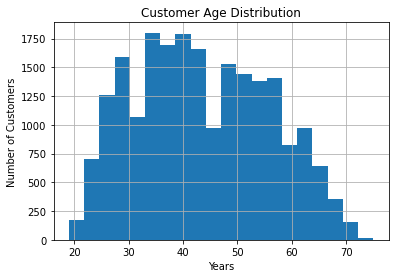

In [67]:
# value distribution in the `age` variable without zero values

df[df['age'] >= 19]['age'].hist(bins = 20).set(title = 'Customer Age Distribution', xlabel = 'Years', ylabel = 'Number of Customers');

As can be inferred from the histogram above, the customers' age has almost normal distribution. Let's take a look at the value distribution of the `age` variable for the subset with only `NaN` values in the `days_employed` column.

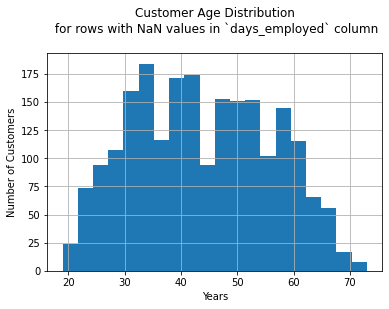

In [68]:
# value distribution of the `age` variable (without zero values) and only for NaN values in the `days_employed` column

df[(df['days_employed'].isnull()) & 
   (df['age'] >= 19)]['age'].hist(bins = 20).set(title = 'Customer Age Distribution\n for rows with NaN values in `days_employed` column\n', 
                                                 xlabel = 'Years', ylabel = 'Number of Customers');

This histogram is quite similar to the one above. It means this subset's customers do not differ in age distribution from all the customers, so I can assume the distribution of length of work experience for them do not differ either. Thus, I can fill the missing values of the `days_employed` variable with the mean or median of the existing values. 

However, the `days_employed` variable has unrealistic values: 

- 15906 rows have negative values 
- 3445 rows have incredibly large values.

A minus sign may be an artifact, and negative values are actually positive. To check this assumption, I will convert the negative values to positive and compare the `days_employed` value distribution with the `age` value distribution but only for rows with the ex-negative `days_employed` values. For easier understanding, I will also transform the days to years.

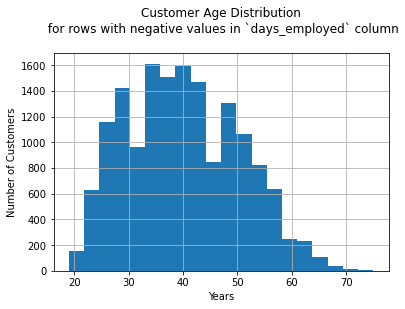

In [69]:
# `age` value distribution (without zero values) only on the subset with the negative `days_employed` values

df[(df['days_employed'] < 0) & 
   (df['age'] >= 19)]['age'].hist(bins = 20).set(title = 'Customer Age Distribution\n for rows with negative values in `days_employed` column\n', 
                                                 xlabel = 'Years', ylabel = 'Number of Customers');

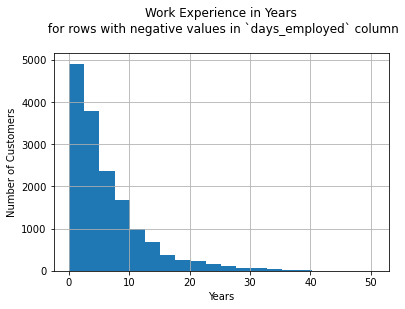

In [70]:
# `days_employed` negative value distribution on the same subset

abs(df[(df['days_employed'] < 0) & (df['age'] >= 19)]['days_employed']).div(365).hist(bins = 20).set(title = 'Work Experience in Years\n for rows with negative values in `days_employed` column\n', 
                                                                                                     xlabel = 'Years', ylabel = 'Number of Customers');

Now value distributions are very different from each other. The second histogram shows us, that most customers have too short work experience for their ages.

My next step is to compare the `age` and the `days_employed` value distributions on the subset with only positive large values in the `days_employed` column. Again, for easier understanding, I will also transform the days to years.

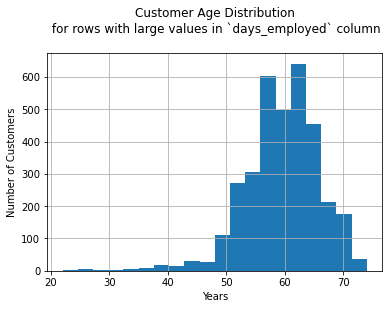

In [71]:
# `age` value distribution (without zero values) only for the subset with the large `days_employed` values

df[(df['days_employed'] > 0) 
   & (df['age'] >= 19)]['age'].hist(bins = 20).set(title = 'Customer Age Distribution\n for rows with large values in `days_employed` column\n', 
                                                   xlabel = 'Years', ylabel = 'Number of Customers');

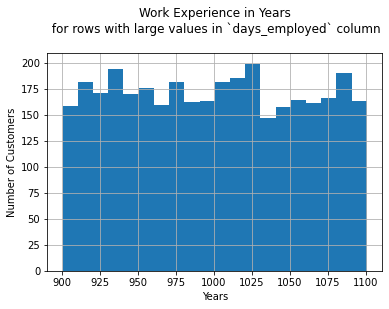

In [72]:
# `days_employed` large value distribution on the same subset

df[(df['days_employed'] > 0) & 
   (df['age'] >= 19)]['days_employed'].div(365).hist(bins = 20).set(title = 'Work Experience in Years\n for rows with large values in `days_employed` column\n', 
                                                                    xlabel = 'Years', ylabel = 'Number of Customers');

And again, the value distributions are very different. Although the `age` histogram is skewed, and most of the customers of this subset are older than 50, the `days_employed` histogram tells us that their length of work experience is more or less equal, not to mention unrealistically long.

Based on this research, I can only assume that the `days_employed` variable consists of totally incorrect values. I suppose that in the original data source, the variable was represented by, for example, a formula or an SLQ-query and was just broken during the extracting process. This is also indicated by the fact that the `total_income` and `days_employed` variables are not integers, although it is quite strange to represent working days or annual income as fractional numbers with so many decimal places. So I quite sure that just convert the `days_employed` negative values into positive and then fill missing values in the `days_employed` column with the mean or median could create misleading data.

Since there are no questions related to the `days_employed` variable, I prefer to keep it as is. If the values could be evaluated as plausible, it would be correct to use the same way to fill missing values, which we used for filling the `total_income` missing values.

Finally, I should explain the possible reasons why missing values were present. I think it could have happened if two or more datasets were merged, and one of them did not contain the `total_income` and `days_employed` columns. As a result, in the final dataset, the `NaN` values have appeared in the rows from that dataset.

### Conclusion

The main goal of this stage of preprocessing data was to fill in missing values. In the first step of the project, I identified two columns with missing values: `total_income` and `days_employed`.

At first, I made sure that the missing values in both columns were in the same rows. 

Then I had to identify the type of missing data. To do this, I compared the value distribution of all variables on the entire dataset and on the subset consisting only of the rows with missing values in `total_income` and `days_employed` columns. The only variable value distribution of which I decided not to compare was `purpose`. There are 38 unique values in the `purpose` column, and their distributions would not be clear enough to see the differences between the dataset and the subset with missing values. So, I categorized all purposes into 4 categories and created a new column `purpose_category`, filling it with them. For comparing value distributions I used the `purpose_category` variable insted of the `purpose`variable.

I did not find significant differences between the dataset and the subset with missing values, so I conclude that missing data were MCAR or MAR and could be replaced with the mean or median.

To replace the missing values in the `total_income` column, I found medians for every type of income and use them to fill in missing values accordingly for each income type.

Before filling in missing values in the `days_employed` column, I tried to fix other issues in this column like negative values and incredibly large values. Unfortunately, I failed as I did not find any pattern in the corrupted data, which could help me restore them correctly. I decided that filling in missing values could create more incorrect values and leave the column without changes. In the real world, I would try to contact the data provider and get correct dataset or figure out ways to restore this column. 

<a id='step24'><a>
### __4. Change data type of `total_income` from float to int__

In [73]:
# change data type for `total_income` variable from float to integer using `astype` method

df['total_income'] = df['total_income'].astype(int)

# check the result

df['total_income'].dtypes

dtype('int64')

### Conclusion

I changed the `total_income` column's data type from float to integer using `astype()` method. Since I kept the `day_employed` variable without changes there is no point to transform its values to integer. 

<a id='step25'><a>
### __5. Processing duplicates__

To find duplicate rows in the dataset in the step 1, I use the `duplicated()` method. Let's check the number of duplicates again since it could have changed because of fixing the `education` vatiable. 

In [74]:
# check number of duplicate rows with `duplicated()` method

df.duplicated().sum()

71

In [75]:
# percentage of the duplicate rows in the dataset

print('{:.1%}'.format(71/df.shape[0]))

0.3%


Let's look closer to the groups of duplicates.

In [76]:
# all duplicated rows sorting by the `age` column

df[df.duplicated(keep = False)].sort_values(by = 'age')

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
20297,1,NaN,23,secondary education,1,civil partnership,1,F,employee,0,22815,to have a wedding,wedding
8853,1,NaN,23,secondary education,1,civil partnership,1,F,employee,0,22815,to have a wedding,wedding
15892,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,22815,second-hand car purchase,car
19321,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,22815,second-hand car purchase,car
3452,0,NaN,29,bachelor's degree,0,married,0,M,employee,0,22815,buy residential real estate,real estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,18962,transactions with my real estate,real estate
9528,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,18962,transactions with my real estate,real estate
9604,0,NaN,71,secondary education,1,civil partnership,1,F,retiree,0,18962,having a wedding,wedding
7938,0,NaN,71,secondary education,1,civil partnership,1,F,retiree,0,18962,having a wedding,wedding


There are 137 duplicated rows but only 71 of them are uniqe, which means that some rows are repeated more than twice. Actually, the last three rows confirm this conclusions.

There are also a lot of `NaN` values in the `days_employed` column and the identical values in `total_income` column (which means they were missing values too). Let's check if there are any other values in `days_employed` variable.

In [77]:
# unique values in the `days_employed` column in all duplicated rows

df[df.duplicated(keep = False)].sort_values(by = 'age')['days_employed'].unique()

array([nan])

In the previous step, I suppose that rows with `NaN` values came from another dataset. We can assume that this dataset also had some issues like duplicate rows, or something went wrong during the merging process. 

I should also point out that the duplicate rows are the same in the columns that do not have many various values. It is quite conceivable that two different women 23 y.o. with secondary education living in common-law partnership were willing to take a loan for a wedding. I could tell for sure if these customers are different, comparing values in the `days_employed` and `total_income` columns as they are the most diverse variables in the dataset. However, since there were only `NaN` values in these columns, we can assume that these rows are duplicates and drop them - it is only 0.3% of the dataset.

In [78]:
# removing duplicates using `drop_duplicates` method

df = df.drop_duplicates()

# check the result

df.duplicated().sum()

0

### Conclusion

I found 71 duplicate rows using the `duplicated()` method. After a little analysis, I removed them using `drop_duplicates()` method.

<a id='step26'><a>
### __6. Fixing unrealistic values in `children` column__

A variable `children` has unrealistic values: `-1` in 47 rows and suspiciously large (`20`) in 76 rows. I think the possible reason these unrealistic values are presented is a data entry error, so a minus sign in `-1` and zero in `20` are just artifacts. 

There are some ways to deal with these issues: 
1) replace `-1` with `1` and `20` with `1` and `2`, respectively;\
2) drop the rows where the `children` variable is equal to `-1` and `20` since these 123 rows are less than 0.6% of the dataset;\
3) replace these values with 0 since 65.7% of customers in the dataset do not have children, and we can ignore the 0.6% increase; 

I choose the second way.

In [79]:
# values in the `children` column

df['children'].value_counts()

 0     14090
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [80]:
# replace `-1` and `20` in the `children` column with 0

df['children'] = df['children'].apply(lambda x: 0 if x == -1 or x == 20 else x)

# check the result

df['children'].value_counts()

0    14213
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

### Conclusion

To fix unrealistic values in the `children` column I created a function for replacing `-1` and `20` values with 0. Then I replace these values in the `children` column using `apply()` method with the function as a parameter. 

<a id='step27'><a>
### __7. Categorizing Data__

To answer the questions, I need to categorize some data. Let's recall the questions:

- is there a connection between having kids and repaying a loan on time?
- is there a connection between marital status and repaying a loan on time?
- is there a connection between income level and repaying a loan on time?
- how do different loan purposes affect on-time loan repayment?

What variables will help me to get the answers? 

At first, "repaying a loan on time" is coded in a `debt` variable, which is represented by two values: `1` and `0`. `0` means a customer repays a loan on time, and `1` means the opposite. Thus, the data is already categorized: there are two categories of customers for the "repaying a loan on time" parameter. 

In [81]:
# unique values in the `debt` column
df['debt'].value_counts()

0    19712
1     1741
Name: debt, dtype: int64

The variable `children` shows how many children customers have, but there is no variable indicating whether the customer has kids at all. So, I need to classify customers by the "having kids" parameter.

In [82]:
# create a new column `having children' with True if the customer has kids and False - if not

df['having_children'] = df['children'] > 0

# check the result

df['having_children'].value_counts()

False    14213
True      7240
Name: having_children, dtype: int64

In [83]:
# recheck the number of single and not single customers

has_children = 0
no_children = 0

for children, number in df.groupby('children'):
    if children > 0:
        has_children += len(number)
    else:
        no_children += len(number)

print('{} customers in the dataset have childfren and {} do not have children.'.format(has_children, no_children))

7240 customers in the dataset have childfren and 14213 do not have children.


As we can see below, there are five types of customers' family status. It would be interesting to analyze not the connection between a specific type of marital status and repaying a loan on time but explore if there is any difference between single and not-single customers for the "repaying a loan on time" parameter. To do this, I should categorize customers into two groups: people who have a partner and people who do not.

In [84]:
# unique values in the 'family_status' column

df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [85]:
# function categorizing values in the `family_status` column by the "having a partner" parameter

def single_or_not(value):
    if 'widow / widower' in value or 'divorced' in value or 'unmarried' in value: 
        return True
    if 'married' in value or 'civil partnership' in value: 
        return False
    else:
        return 'unknown'
    
# create a new column `single` by appling the function` single_or_not` to the `family_status` column

df['single'] = df['family_status'].apply(single_or_not)

# check the result

df['single'].value_counts()

False    16489
True      4964
Name: single, dtype: int64

In [86]:
# recheck the number of single and not single customers

single = 0
not_single = 0

for status, number in df.groupby('family_status'):
    if status in ['married', 'civil partnership']:
        not_single += len(number)
    else:
        single += len(number)

print('There {} single and {} not single customers in the dataset.'.format(single, not_single))

There 4964 single and 16489 not single customers in the dataset.


The next variable I will use to answer the questions is `total_income`. There are two ways to show the connection between income level and repaying a loan on time:

1) plot a graph that shows the relationship between the categorical variable `debt` and the numeric continuous variable `total_income` - a violin plot, for example;
2) categorize the `total_income` variable into several groups and show how the variable `debt` changes for each group.

I choose the second way since the question is about the __*level*__ of income .

Assuming that the dataset is from the US, I will categorize the `total_income` values into the groups according the current income tax brackets.

In [87]:
# create a new column and fill it in with groups of the 'total_income' values using `cut()` method

df['income_level'] = pd.cut(df['total_income'], bins = [0,9875,40125,85525,163300, np.inf])

# check the result

df.groupby('income_level')['income_level'].count()

income_level
(0.0, 9875.0]            884
(9875.0, 40125.0]      17776
(40125.0, 85525.0]      2623
(85525.0, 163300.0]      147
(163300.0, inf]           23
Name: income_level, dtype: int64

Finally, I need to analyze how different loan purposes affect on-time loan repayment. This requires the `purpose` values categorization that I already did in the step 2 working on missing values. Hence to answer the last question I will use `purpose_category` variable.

In [88]:
# values of the `purpose_category` variable

df['purpose_category'].value_counts()

real estate    10810
car             4306
education       4013
wedding         2324
Name: purpose_category, dtype: int64

In [89]:
df['purpose_category'].unique()

array(['real estate', 'car', 'education', 'wedding'], dtype=object)

### Conclusion

In this step I determined which variables I need to answer the project's questions. They are `debt`, `children`, `family status`, `total_income` and `purpose`. I decided to categorize `children`, `family status`, `total_income` and `purpose` values into groups and create a new columns for them. 

I split the customers into those who have children and who do not creating the `having_children` columns with 2 values: `True` and `False`. 

Using the same principle, I split customers into those who have a partner and who do not and create the `single` column also with 2 values: `True` and `False`.

Based on the US tax breackets, I categorized the `total_income` values into 5 groups using `cut()` method with the following bins: (0, 9875], (9875, 40125], (40125, 85525], (85525, 163300], (163300, ∞]. 

The `purpose` values were already categorized in the step 2. I created the the `purpose_category` column with 4 values: `real estate`, `car`, `education`, `wedding`.

Such categorization will help us to answer the project's questions without having to build graphs or use complex statistical methods.

____

<a id='step3'><a>
## __Analyzing Data__

### __1) Is there a relationship between having kids and repaying a loan on time?__

To answer the question, I will compare two groups of the customers: those who have children and those who do not, using `having_children` variable. I will create a pivot table using `pivot_table()` method with the following parameters: `index = ['having_children'], values = ['debt'], aggfunc = ['count', 'mean']`. The `count` parameter shows a number of values of `['debt']` variable for corresponding `having_children` values.

The numbers in the table represent the mean of the `debt` variable for each customer group. Since the `debt` variable has two values, `1` and `0`, the mean for the group is calculated as the sum of ones divided by the group's total number of values. Thus, the numbers in the table are equal to the share of the customers in the group who have debt.

In [90]:
# create a pivot table

having_children_pivot = pd.pivot_table(df, index = ['having_children'], values = ['debt'], aggfunc = ['count', 'mean'])

# check the result 

having_children_pivot

,count,mean
,debt,debt
having_children,,
False,14213,0.075424
True,7240,0.092403


As we can see above, in both groups, the shares of clients with debt are not significant, about 7.5% for those who have kids and 9.2% for those who do not. It seems even though the second number is slightly higher, the shares of the customers who defaulted on their loans are close enough to conclude that having kids doesn't affect repaying a loan on time.

To make sure that my conclusion is correct, I should find a correlation between `having_children` and `debt`. Since both variables are categorical and dichotomous, I can create a 2x2 table and then use a chi-squared test to find out whether the variables are correlated with each other or not.

In [91]:
# create a crosstable for the `having_children` and `debt` variables

having_children_corr = pd.crosstab(index = df['having_children'], columns = df['debt'])

# check the result

having_children_corr

debt,0,1
having_children,,
False,13141,1072
True,6571,669


In [92]:
# use `scipy.stats.chi2_contingency` test to find a correlation between `having_children` and `debt` variables

print('The p-value of the chi-squared test is: {:f}.'.format(scipy.stats.chi2_contingency(having_children_corr)[1]))

The p-value of the chi-squared test is: 0.000019.


Since the p-value is less than 0.05, I fail to reject the null hypothesis (the two variables are independent). This means `having_children` and `debt` variables are correlated. So, I have to admit that my above conclusion was incorrect. Even the differences between customers with children and without them defaulted on their loans is only 1.7%, it's statistically significant. Thus, I can conclude that having children affects repaying a loan on time.

Well, what about a connection between a specific number of children and a customer default? I will create a new pivot table with `children` as an index instead of `having_children` and `debt` as values.

In [93]:
# create a pivot table

children_pivot = pd.pivot_table(df, index = ['children'], values = ['debt'], aggfunc = ['count', 'mean'])

# check the result 

children_pivot

,count,mean
,debt,debt
children,,
0,14213,0.075424
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000


The only curious result is 0 for people who have 5 children. However, it just means that we do not have enough values to get a full picture of the group of customers having 5 kids since there are only 9 of them.

Let's check if there is a correlation between the `children` and `debt` variables. Since the `children` is quantitative continuous and the `debt` is dichotomous, to find the correlation between them, I will calculate a point biserial correlation coefficient and the associated p-value.

In [94]:
# use `scipy.stats.pointbiserialr` to find a point biserial correlation coefficient and p-value

children_coeff = round(scipy.stats.pointbiserialr(df['debt'], df['children'])[0], 3)
children_pvalue = round(scipy.stats.pointbiserialr(df['debt'], df['children'])[1], 4)

# print the result

print('The point biserial correlation coefficient is {} and p-value is {}.'.format(children_coeff, children_pvalue))

The point biserial correlation coefficient is 0.025 and p-value is 0.0003.


The positive correlation coefficient indicates that when the variable `debt` takes on the value `1`, the variable `children` tends to take on higher values than when the variable `debt` takes on the value `0`. In other words, the more children a customer has, the more likely they default. This correlation is statistically significant since the p-value is much less than 0.05. However, the coefficient is close to 0, so the specific number of children is not strongly connected with the customer's ability to repay a loan on time.

### Conclusion

According to the results obtained, having children indeed affects repaying a loan on time; the specific number of children is not really important though.

### __2) Is there a relationship between marital status and repaying a loan on time?__

To answer the question, I will use the same idea that I use to answer the previous question and compare the other two customer groups: those who have a partner and those who do not, using `single` variable. I will create a pivot table using `pivot_table()` method with the following parameters: `index = ['single'], values = ['debt'], aggfunc = ['count', 'mean']`. 

In [95]:
# create a pivot table

marital_status_pivot = pd.pivot_table(df, index = ['single'], values = ['debt'], aggfunc = ['count', 'mean'])

# check the result 

marital_status_pivot

,count,mean
,debt,debt
single,,
False,16489,0.079993
True,4964,0.085012


The same story as above: only 8% of the single customers and 8.5% of the non-single customers defaulted on their loans; these portions are not very big and almost equal. However, to ensure that the difference is not statistically significant, I will perform a chi-squared test in the same way as before.

In [96]:
# create a crosstable for the `single` and `debt` variables

marital_status_corr = pd.crosstab(index = df['single'], columns = df['debt'])

# check the result

marital_status_corr

debt,0,1
single,,
False,15170,1319
True,4542,422


In [97]:
# use `scipy.stats.chi2_contingency` test to find a correlation between `single` and `debt` variable and print the result

print('The p-value of the chi-squared test is: {}.'.format(round(scipy.stats.chi2_contingency(marital_status_corr)[1], 3)))

The p-value of the chi-squared test is: 0.269.


Since p-value is greater than 0.05, I can conclude there is no correlation between having a partner and on-time repayment of a loan. However, maybe there is a connection between a specific marital status and a customer default? Let's check it using `family_status` variable to create a pivot table. 

In [98]:
# create a pivot table

family_status_pivot = pd.pivot_table(df, index = ['family_status'], values = ['debt'], aggfunc = ['count', 'mean'])

# check the result 

family_status_pivot

,count,mean
,debt,debt
family_status,,
civil partnership,4151,0.093471
divorced,1195,0.071130
married,12338,0.075458
unmarried,2810,0.097509
widow / widower,959,0.065693


As we can see, the proportions of defaulters range from 0.07 to almost 0.1. To check if the proportions differ from each other statistically significant, I will perform a chi-squared test for the `family_status` and `debt` variables.

In [99]:
# create a new table with only `family_status` and `debt` variables

fm_corr = df[['family_status', 'debt']]

# create a crosstable for further calculation

fm_corr = pd.crosstab(index = fm_corr['debt'], columns = fm_corr['family_status'])

# check the result

fm_corr

family_status,civil partnership,divorced,married,unmarried,widow / widower
debt,,,,,
0,3763,1110,11407,2536,896
1,388,85,931,274,63


In [100]:
# use `scipy.stats.chi2_contingency` test to find a correlation between the `family_status` and `debt` variable and print the result

print('The p-value of the chi-squared test is: {:f}.'.format(scipy.stats.chi2_contingency(fm_corr)[1]))

The p-value of the chi-squared test is: 0.000010.


Since the p-value is less than 0.05, I can conclude that there is an association between family status and repaying their loan on time. So the most disciplined borrowers are widows and widowers, and the least are unmarried customers. 

### Conclusion

The results allow me to say that customers' marital status is correlated with their ability to repay a loan on time. Widowed and divorced clients are more disciplined than unmarried and those who are in a common-law relationship.

### __3) Is there a relation between income level and repaying a loan on time?__

Again, I will compare some customer groups but this time with varying levels of income, creating a pivot table using `pivot_table()` method with the following parameters: `index = ['income_level'], values = ['debt'], aggfunc = ['count', 'mean']`.

In [101]:
# create a pivot table

income_level_pivot = pd.pivot_table(df, index = ['income_level'], values = ['debt'], aggfunc = ['count', 'mean'])

# check the result 

income_level_pivot

,count,mean
,debt,debt
income_level,,
"(0.0, 9875.0]",884,0.064480
"(9875.0, 40125.0]",17776,0.083821
"(40125.0, 85525.0]",2623,0.070149
"(85525.0, 163300.0]",147,0.054422
"(163300.0, inf]",23,0.086957


The shares of the customers with varying income levels who were not repaying their loans in time are also not much different: the proportions of defaulters range from 0.05 to almost 0.09.

However, I can check if there is a correlation between the `total_income` (quantitative continuous) and `debt` (dichotomous) variables by calculating a point biserial correlation coefficient and the associated p-value.|

In [102]:
# use `scipy.stats.pointbiserialr` to find a point biserial correlation coefficient and p-value

pbs_coeff = round(scipy.stats.pointbiserialr(df['debt'], df['total_income'])[0], 3)
pbs_pvalue = round(scipy.stats.pointbiserialr(df['debt'], df['total_income'])[1], 3)

# print the result

print('The point biserial correlation coefficient is {} and p-value is {}.'.format(pbs_coeff, pbs_pvalue))

The point biserial correlation coefficient is -0.013 and p-value is 0.066.


The correlation coefficient is negative, which indicates that when the variable `debt` takes on the value `0`, the variable `total_income` tends to take on higher values than when the variable `debt` takes on the value `1`. In other words, the higher the customers' income, the less likely they default. However, the coefficient is close to 0, which means that the correlation is not strong. The p-value is greater than 0.05, which means that the correlation is also not statistically significant. 

### Conclusion

The results obtained allow me to conclude that even if there is some positive correlation between income amount and the tendency of repaying a loan on time, this correlation is weak and not statistically significant.

### __4) How do different loan purposes affect on-time repayment of a loan?__

The answer to the question requires the same actions as before: compare customer groups creating a pivot table. Since the loan purposes are represented by the `purpose_category` variable the following parameters of the `pivot_table()` method will be used: `index = ['purpose_category'], values = ['debt'], aggfunc = ['count', 'mean']`.

In [103]:
# create a pivot table

purposes_pivot = pd.pivot_table(df, index = ['purpose_category'], values = ['debt'], aggfunc = ['count', 'mean'])

# check the result 

purposes_pivot

,count,mean
,debt,debt
purpose_category,,
car,4306,0.093590
education,4013,0.092200
real estate,10810,0.072340
wedding,2324,0.080034


As we can see, the customers with different loan purposes defaulted on their loans in almost equal proportions. However, it seems that customers who took a loan to buy a car or get an education failed to repay their loans more often. 

I will perform a chi-squared test for the `purpose_category` and `debt` variables to check if the proportions differ from each other statistically significant. To do this, I will create a cross table using `purpose_category` and `debt` columns.

In [104]:
# create a crosstable for the `purpose_category` and `debt` variables

pc_corr = pd.crosstab(index = df['debt'], columns = df['purpose_category'])

# check the result

pc_corr

purpose_category,car,education,real estate,wedding
debt,,,,
0,3903,3643,10028,2138
1,403,370,782,186


In [ ]:
# use `scipy.stats.chi2_contingency` test to find a correlation between the `family_status` and `debt` variable and print the result

print('The p-value of the chi-squared test is: {:f}.'.format(scipy.stats.chi2_contingency(pc_corr)[1]))

The p-value is less than 0.05. This allows us to conclude that the difference in repaying a loan on time among the customers with different loan purposes is statistically significant. 

### Conclusion

Based on the results obtained, I can conclude that the different loan purposes do affect on-time repayment of a loan. The customers who took a loan to buy a car or get an education are more likely to be unable to repay their loans.

<a id='step4'><a>
## __General conclusion__

The subject of this analysis was a Credit Scoring dataset describing more than 200 hundred customers who took a loan in a bank. The dataset contains information about their age, gender, education, work experience, family and financial situation, and even their loan purposes. The main goal of the analysis was to find a connection between specific customers' features and repaying their loans on time. I analyzed the following features: number of children, marital status, level of income and a reason for a loan.

In the first step of the project, I obtained general information about the dataset and its variables and identified the main issues that should have been fixed before the analysis. I found duplicated rows, missing and zero values, incorrect data types, unrealistic values, unclear variable naming, inconsistent use of capitalization and variable values that should have been reduced. 

Then, I preprocessed the dataset and prepared for the exploratory analysis, working on all the dataset's flaws discovered at the previous stage. The only problematic variable, "days_employed," remained unchanged since no patterns that could help to restore this broken data were found. However, the variable wasn't crucial for further analysis; otherwise, it would be reasonable to conduct more complex research and eventually find the right way to fix the variable.

Finally, I analyzed connections between repaying a loan on time and customer's number of children, marital status, level of income, their loan purposes answered to find the riskiest category of customers. 

- I can safely say that the main factor the bank should consider when giving a loan is whether a customer has children or not. There is also a tendency that the more children a customer has, the more likely they default, though it's not that pronounced. 

- I can safely recommend considering the marital status when giving a loan: the most reliable borrowers are widowed people, and the least - unmarried.

- The income level should not be a crucial factor for approval of a loan application since the positive correlation between customer's income and their ability to repay the loan on time is weak and not statistically significant.

- Finally, a specific loan purpose can also be considered an important factor when giving a loan. Clients who take loans to buy a car or get an education more often default on their loans.

Considering the above, I can say that the riskiest category of customers is clients with kids or unmarried or who need a loan to buy a car or get an education. These customers do not repay their loans more often than other customers.